<a href="https://colab.research.google.com/github/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/blob/main/RSG_DaNetQA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка английского датасета для сравнения

In [1]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://dl.fbaipublicfiles.com/glue/superglue/data/v2/BoolQ.zip" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

Archive:  temp.zip
   creating: data/BoolQ/
  inflating: data/BoolQ/train.jsonl  
  inflating: data/BoolQ/test.jsonl   
  inflating: data/BoolQ/val.jsonl    



     0K .......... .......... .......... .......... ..........  1%  697K 6s
    50K .......... .......... .......... .......... ..........  2%  592K 6s
   100K .......... .......... .......... .......... ..........  3%  850K 6s
   150K .......... .......... .......... .......... ..........  4% 63.2M 4s
   200K .......... .......... .......... .......... ..........  6% 77.0M 3s
   250K .......... .......... .......... .......... ..........  7%  716K 4s
   300K .......... .......... .......... .......... ..........  8% 67.8M 3s
   350K .......... .......... .......... .......... ..........  9% 63.5M 3s
   400K .......... .......... .......... .......... .......... 11%  114M 2s
   450K .......... .......... .......... .......... .......... 12%  711K 3s
   500K .......... .......... .......... .......... .......... 13% 57.0M 2s
   550K .......... .......... .......... .......... .......... 14% 32.9M 2s
   600K .......... .......... .......... .......... .......... 16% 71.9M 2s
   650K ...

# Загрузка русскоязычного датасета

In [2]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://russiansuperglue.com/tasks/download/DaNetQA" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

Archive:  temp.zip
   creating: data/DaNetQA/
  inflating: data/DaNetQA/train.jsonl  
   creating: data/__MACOSX/
   creating: data/__MACOSX/DaNetQA/
  inflating: data/__MACOSX/DaNetQA/._train.jsonl  
  inflating: data/DaNetQA/.DS_Store  
  inflating: data/__MACOSX/DaNetQA/._.DS_Store  
  inflating: data/DaNetQA/test.jsonl  
  inflating: data/__MACOSX/DaNetQA/._test.jsonl  
  inflating: data/DaNetQA/val.jsonl  
  inflating: data/__MACOSX/DaNetQA/._val.jsonl  
  inflating: data/__MACOSX/._DaNetQA  



     0K .......... .......... .......... .......... ..........  3%  369K 3s
    50K .......... .......... .......... .......... ..........  7%  372K 3s
   100K .......... .......... .......... .......... .......... 11% 74.4M 2s
   150K .......... .......... .......... .......... .......... 15%  374K 2s
   200K .......... .......... .......... .......... .......... 19% 67.6M 2s
   250K .......... .......... .......... .......... .......... 23% 79.0M 1s
   300K .......... .......... .......... .......... .......... 27% 90.5M 1s
   350K .......... .......... .......... .......... .......... 31%  375K 1s
   400K .......... .......... .......... .......... .......... 35% 75.0M 1s
   450K .......... .......... .......... .......... .......... 39% 87.6M 1s
   500K .......... .......... .......... .......... .......... 43% 73.5M 1s
   550K .......... .......... .......... .......... .......... 47% 77.3M 1s
   600K .......... .......... .......... .......... .......... 51% 86.8M 1s
   650K ...

Fancy way to display content of the dataset directory

In [3]:
%%bash
# add tree package for fancy directory display
apt-get install tree

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (149 kB/s)
Selecting previously unselected package tree.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [4]:
# display the content of the folder
!tree

.
└── data
    ├── BoolQ
    │   ├── test.jsonl
    │   ├── train.jsonl
    │   └── val.jsonl
    └── DaNetQA
        ├── test.jsonl
        ├── train.jsonl
        └── val.jsonl

3 directories, 6 files


# Загрузка в pandas

In [5]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

class JSONL_handler():
    """ opens a jsonl file and turns it into a necessary data structure """
    
    def __init__(self, path):
        self.path = path # path to jsonl file

    def to_pandas(self):
        """ get jsonl file content as a pandas DataFrame"""
        return pd.read_json(path_or_buf=self.path, lines=True)

In [6]:
handler = JSONL_handler('data/DaNetQA/train.jsonl')
df = handler.to_pandas()

[Pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf?platform=hootsuite) for reference


In [7]:
handler_en = JSONL_handler('data/BoolQ/train.jsonl')
df_en = handler_en.to_pandas()

# Общая информация про train

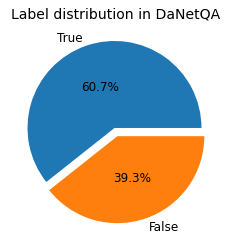

In [8]:
import matplotlib.pyplot as plt
plt.title('Label distribution in DaNetQA', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12))
plt.show()

In [9]:
df['label'].value_counts()

True     1061
False     688
Name: label, dtype: int64

In [10]:
df_en['label'].value_counts()

True     5874
False    3553
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


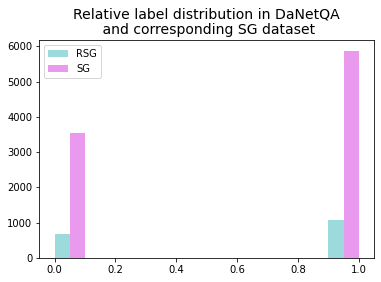

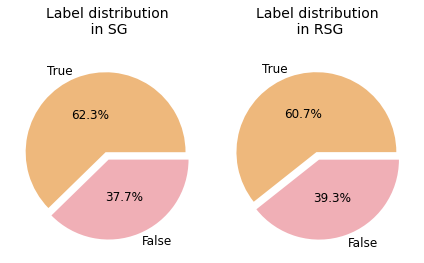

In [11]:
plt.title('Relative label distribution in DaNetQA\n and corresponding SG dataset', fontsize=14)
plt.hist(x = [df['label'], df_en['label']], color=["#9ddadc", "#e99aee"], label=['RSG','SG'], rwidth = 50) 
plt.legend(loc='best')
plt.show()
print()

plt.subplot(1,2,1)
colours = {'#9ddca6', '#f0afb6', '#eeb87c'}

plt.title('Label distribution\n in SG\n', fontsize=14)
plt.pie(df_en['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df_en['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.subplot(1,2,2)

plt.title('Label distribution\n in RSG\n', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.tight_layout()
plt.show()

In [ ]:
df.head(6)

,question,passage,label,idx
0,Вднх - это выставочный центр?,«Вы́ставочный центр» — станция Московского монорельса. Расположена между станциями «Улица Академика Королёва» и «Улица Сергея Эйзенштейна». Находится на территории Останкинского района Северо-Восточного административного округа города Москвы. Переход на станцию ВДНХ Калужско-Рижской линии. Названа в честь Всероссийского выставочного центра — названия ВДНХ с 1992 по 2014 год. 20 ноября 2004 года линия монорельса начала работать в «экскурсионном режиме» и перевезла первых пассажиров .,True,0
1,Вднх - это выставочный центр?,"Вы́ставка достиже́ний наро́дного хозя́йства , в 1959—1991 годах — Вы́ставка достиже́ний наро́дного хозя́йства СССР , в 1992—2014 годах — Всеросси́йский вы́ставочный центр ) — выставочный комплекс в Останкинском районе Северо-Восточного административного округа города Москвы, второй по величине выставочный комплекс в городе. Входит в 50 крупнейших выставочных центров мира. Ежегодно ВДНХ посещают 30 млн гостей. 1 августа 2019 года выставка отпраздновала 80-летний юбилей. Территориально ВДНХ объединена с парком «Останкино» и Главным ботаническим садом , их общая площадь составляет почти 700 га: 240,2 га — площадь ВДНХ, 75,6 га — площадь парка «Останкино», 361 га — площадь ГБС, 9,5 га музейно-выставочный центр «Рабочий и колхозница» и площадь перед аркой Главного входа. На территории Выставки расположено множество шедевров архитектуры — 49 объектов ВДНХ признаны памятниками культурного наследия.",True,1
2,Был ли джиган в black star?,"Вместе с этим треком они выступили на церемонии вручения наград MTV RMA — это был первый выход Джигана на большую сцену. В 2007 году Джиган стал официальным артистом лейбла Black Star Inc., выпустил первый песню и клип «Одноклассница» — совместная работа с Тимати. В марте 2011 года появилась совместная с Юлей Савичевой композиция «Отпусти». Песня поднялась в радиочарте «Tophit» до 8 места и заняла первое место чарта Weekly Audience Choice Top Hit . Количество просмотров клипа на YouTube превысило 17 миллионов.",True,2
3,Xiaomi конкурент apple?,"Xiaomi — китайская компания, основанная в 2010 году и занимающаяся выпуском электроники и бытовой техники, а также разработкой программного обеспечения. Основной продукцией компании являются смартфоны, первый из которых был выпущен в 2011 году. В настоящее время Xiaomi производит широкий ассортимент смартфонов в разных ценовых сегментах и является одним из крупнейших производителей смартфонов в мире. Так, в третьем квартале 2014 года эта компания заняла наивысшее для себя третье место в мире по поставкам смартфонов, набрав 5,2 % в штучном выражении и уступив лишь Samsung и Apple . За весь 2017 год компания заняла по продажам первое место в Китае и второе место в Индии. В данном списке приводятся все смартфоны, когда-либо выпущенные компанией Xiaomi.",True,3
4,Был ли автомат калашникова в вов?,"Отметив некоторые недостатки и в целом удачную конструкцию, специалисты ГАУ не рекомендовали принимать ПП Калашникова на вооружение по технологическим причинам. Заключение гласило: С 1942 года Калашников работал на Центральном научно-исследовательском полигоне стрелкового и миномётного вооружения ГАУ РККА. Здесь в 1944 году он создал опытный образец самозарядного карабина, который, хотя и не вышел в серийное производство, частично послужил прототипом для создания автомата. С 1945 года Михаил Калашников начал разработку автоматического оружия под промежуточный патрон 7,62×39 образца 1943 года. Автомат Калашникова победил в конкурсе 1947 года и был принят на вооружение.",False,4
5,Может ли автомобиль ездить на газу?,"Автомобиль на природном газе — один из видов автомобилей на альтернативном топливе — они используют компримированный природный газ или сжиженный природный газ . К этому классу не относятся автомобили, использующие в качестве топлива пропан-бутановую смесь, так как это принципиально другая технология. Мировыми лидерами по количеству автомобилей на природном газе являются: Иран — 3,3 ми

# True

In [ ]:
df_true = df[(df['label'] == True)]
df_true.head()

,question,passage,label,idx
0,Вднх - это выставочный центр?,«Вы́ставочный центр» — станция Московского монорельса. Расположена между станциями «Улица Академика Королёва» и «Улица Сергея Эйзенштейна». Находится на территории Останкинского района Северо-Восточного административного округа города Москвы. Переход на станцию ВДНХ Калужско-Рижской линии. Названа в честь Всероссийского выставочного центра — названия ВДНХ с 1992 по 2014 год. 20 ноября 2004 года линия монорельса начала работать в «экскурсионном режиме» и перевезла первых пассажиров .,True,0
1,Вднх - это выставочный центр?,"Вы́ставка достиже́ний наро́дного хозя́йства , в 1959—1991 годах — Вы́ставка достиже́ний наро́дного хозя́йства СССР , в 1992—2014 годах — Всеросси́йский вы́ставочный центр ) — выставочный комплекс в Останкинском районе Северо-Восточного административного округа города Москвы, второй по величине выставочный комплекс в городе. Входит в 50 крупнейших выставочных центров мира. Ежегодно ВДНХ посещают 30 млн гостей. 1 августа 2019 года выставка отпраздновала 80-летний юбилей. Территориально ВДНХ объединена с парком «Останкино» и Главным ботаническим садом , их общая площадь составляет почти 700 га: 240,2 га — площадь ВДНХ, 75,6 га — площадь парка «Останкино», 361 га — площадь ГБС, 9,5 га музейно-выставочный центр «Рабочий и колхозница» и площадь перед аркой Главного входа. На территории Выставки расположено множество шедевров архитектуры — 49 объектов ВДНХ признаны памятниками культурного наследия.",True,1
2,Был ли джиган в black star?,"Вместе с этим треком они выступили на церемонии вручения наград MTV RMA — это был первый выход Джигана на большую сцену. В 2007 году Джиган стал официальным артистом лейбла Black Star Inc., выпустил первый песню и клип «Одноклассница» — совместная работа с Тимати. В марте 2011 года появилась совместная с Юлей Савичевой композиция «Отпусти». Песня поднялась в радиочарте «Tophit» до 8 места и заняла первое место чарта Weekly Audience Choice Top Hit . Количество просмотров клипа на YouTube превысило 17 миллионов.",True,2
3,Xiaomi конкурент apple?,"Xiaomi — китайская компания, основанная в 2010 году и занимающаяся выпуском электроники и бытовой техники, а также разработкой программного обеспечения. Основной продукцией компании являются смартфоны, первый из которых был выпущен в 2011 году. В настоящее время Xiaomi производит широкий ассортимент смартфонов в разных ценовых сегментах и является одним из крупнейших производителей смартфонов в мире. Так, в третьем квартале 2014 года эта компания заняла наивысшее для себя третье место в мире по поставкам смартфонов, набрав 5,2 % в штучном выражении и уступив лишь Samsung и Apple . За весь 2017 год компания заняла по продажам первое место в Китае и второе место в Индии. В данном списке приводятся все смартфоны, когда-либо выпущенные компанией Xiaomi.",True,3
5,Может ли автомобиль ездить на газу?,"Автомобиль на природном газе — один из видов автомобилей на альтернативном топливе — они используют компримированный природный газ или сжиженный природный газ . К этому классу не относятся автомобили, использующие в качестве топлива пропан-бутановую смесь, так как это принципиально другая технология. Мировыми лидерами по количеству автомобилей на природном газе являются: Иран — 3,3 миллиона автомобилей, Пакистан — 3,1 миллиона автомобилей, Аргентина — 2,17 миллиона автомобилей, Бразилия — 1,73 миллиона автомобилей, Индия — 1,50 миллиона автомобилей. Азиатско-Тихоокеанский регион лидирует по количеству автомобилей на природном газе с 8,45 миллионами автомобилей, за ним идет Латинская Америка с 4,43 миллионами автомобилей. 90 % автомобилей на природном газе в Латинской Америке двухтопливные — они могут использовать в качестве моторного топлива как компримированный природный газ , так и бензин. Большинство автомобилей с бензиновым двигателем могут быть переоборудованы на использовани...",True,5


# False

In [ ]:
df_false = df[(df['label'] != True)]
df_false.head()

,question,passage,label,idx
4,Был ли автомат калашникова в вов?,"Отметив некоторые недостатки и в целом удачную конструкцию, специалисты ГАУ не рекомендовали принимать ПП Калашникова на вооружение по технологическим причинам. Заключение гласило: С 1942 года Калашников работал на Центральном научно-исследовательском полигоне стрелкового и миномётного вооружения ГАУ РККА. Здесь в 1944 году он создал опытный образец самозарядного карабина, который, хотя и не вышел в серийное производство, частично послужил прототипом для создания автомата. С 1945 года Михаил Калашников начал разработку автоматического оружия под промежуточный патрон 7,62×39 образца 1943 года. Автомат Калашникова победил в конкурсе 1947 года и был принят на вооружение.",False,4
13,Был ли ссср участником бернской конвенции?,"Бе́рнская конве́нция по охра́не литерату́рных и худо́жественных произведе́ний — международное соглашение в области авторского права, принятое в Берне, Швейцария в 1886 году. Является ключевым международным соглашением в этой области. В настоящее время администрируется Всемирной организацией интеллектуальной собственности. Бернская конвенция была принята 9 сентября 1886 года в Берне, Швейцария. Первыми участниками конвенции были: Бельгия, Германия, Франция, Испания, Великобритания, Тунис и Швейцария.",False,13
14,Был ли ссср участником бернской конвенции?,"Российская империя планировала присоединиться к Бернской конвенции в начале XX века, но, согласно Стояновичу, это не было реализовано из-за начала Первой мировой войны. После Октябрьской революции Советский Союз изначально вообще не имел международных обязательств в сфере авторского права. Во время проведения новой экономической политики советское правительство неудачно пыталось заключить новые двусторонние соглашения с Великобританией, Германией и Италией. После этих провалившихся попыток СССР сохранял изоляционистскую политику в сфере авторского права до конца 1960-х годов. Первое двустороннее соглашение с Венгрией вступило в силу 17 ноября 1967 года, а 8 октября 1971 года последовало двустороннее соглашение с Болгарией.",False,14
16,Правда ли что слоны боятся мышей?,"Слоновые хорошо слышат в области низких частот, вплоть до инфразвука, но наибольшая чувствительность их слуха на частоте около 1 кГц. Слоны обладают музыкальным слухом и музыкальной памятью, способны различать мелодии из трёх нот, музыку на скрипке и низкие звуки баса и рога предпочитают высоким флейтовым мелодиям. Также, вопреки распространённому заблуждению, слоны абсолютно не боятся мышей и других мелких животных.Слоны — социальные животные. Обычно они образуют группы из самок и детёнышей, возглавляемых старой и опытной самкой. Самцы образуют отдельные стада.",False,16
21,Был ли бриллиант на титанике?,"5 апреля 2012 года, в год 100-летия легендарной катастрофы и 15-летия выпуска фильма состоялась премьера этого фильма в формате 3D и IMAX 3D. В 2017 году фильм был выбран для сохранения в Национальном реестре фильмов США. В 1996 году охотник за сокровищами Брок Лаветт и его команда на научно-исследовательском судне «Академик Мстислав Келдыш» на глубоководных батискафах «Мир-1» и «Мир-2» погружаются на дно Атлантического океана, где покоятся останки лайнера «Титаник», затонувшего 15 апреля 1912 года. Они обнаруживают сейф, в котором, по предположению Лаветта, должно находиться ожерелье с голубым бриллиантом, известное как «Сердце океана». В начале XX века один питтсбургский Ротшильд Натан Хокли приобрёл его для своего сына-промышленника Каледона, который подарил ожерелье в качестве свадебного подарка своей невесте — англичанке Розе Дьюитт Бьюкейтер, вместе с которой он плыл на «Титанике» в США, где они должны были пожениться.",False,21


# Feature analysis

In [14]:
!pip install eli5
import numpy as np
import eli5
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

     |████████████████████████████████| 112kB 4.2MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
data = pd.DataFrame({'passage': df.passage, 'label': df.label})

In [16]:
train, test = train_test_split(data, test_size = 0.2, random_state=21)

In [17]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train.passage)
X_test = vectorizer.transform(test.passage)

y_train = train.label.values
y_test = test.label.values

X_train_da = X_train.toarray()
X_test_da = X_test.toarray()

handler = JSONL_handler('data/DaNetQA/val.jsonl')
df1 = handler.to_pandas()
data_val = pd.DataFrame({'passage': df1.passage, 'label': df1.label})

X_val = vectorizer.transform(data_val.passage).toarray()
y_val = data_val.label

X = vectorizer.transform(data.passage).toarray()
y = data.label

In [34]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
clf = SGDClassifier(loss="log", n_jobs=-1, alpha=0.0001, class_weight='balanced', random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(clf.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 0.7085714285714285
              precision    recall  f1-score   support

       False       0.65      0.62      0.63       143
        True       0.74      0.77      0.76       207

    accuracy                           0.71       350
   macro avg       0.70      0.69      0.70       350
weighted avg       0.71      0.71      0.71       350



In [35]:
clf.fit(X, y)
y_pred = clf.predict(X_val)

# Compute and print metrics
print("Accuracy: {}".format(clf.score(X_val, y_val)))
print(classification_report(y_val, y_pred))

Accuracy: 0.561510353227771
              precision    recall  f1-score   support

       False       0.64      0.27      0.38       409
        True       0.54      0.85      0.66       412

    accuracy                           0.56       821
   macro avg       0.59      0.56      0.52       821
weighted avg       0.59      0.56      0.52       821



In [36]:
eli5.show_weights(clf, top=45, feature_names=vectorizer.get_feature_names())

Weight?,Feature
+2.477,человек
+2.138,людей
+2.131,истории
+1.924,ссср
+1.915,войны
+1.905,17
+1.892,хвост
+1.745,великой
+1.740,город
+1.710,хорошо
